## Question : Lakukan analisis dan buat visualisasi data menggunakan python(matplotlib/seaborn) dari berbagai variable yang tersedia.

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')


Mounted at /content/drive


##Import Dataset

In [37]:
file_dir = "/content/drive/MyDrive/Digital skola/Statistik & visualization"
os.chdir(file_dir)
!ls

cashflow.csv  cashflow_new.csv	ruler_sample_size.csv


In [38]:
import pandas as pd
cashflow = pd.read_csv("/content/drive/MyDrive/Digital skola/Statistik & visualization/cashflow.csv")
cashflow.head()

,Year;Month;Year-Month;Type;Details;Amount
0,2021;9;2021-9;Income;Salary;Rp18.000.000
1,2021;9;2021-9;Expense;Food & Beverage;Rp467.200
2,2021;9;2021-9;Expense;Fitness;Rp173.000
3,2021;9;2021-9;Expense;Transportation;Rp14.000
4,2021;10;2021-10;Income;Salary;Rp12.000.000


mengubah ";" [docs](https://stackoverflow.com/questions/66387970/pandas-read-csv-does-not-separate-values-after-comma)

In [39]:
casflow = cashflow[cashflow.columns[0].split(';')] = cashflow.iloc[:,0].str.split(';', expand=True)


In [40]:
casflow = cashflow[cashflow.columns[0].split(';')]
casflow

,Year,Month,Year-Month,Type,Details,Amount
0,2021,9,2021-9,Income,Salary,Rp18.000.000
1,2021,9,2021-9,Expense,Food & Beverage,Rp467.200
2,2021,9,2021-9,Expense,Fitness,Rp173.000
3,2021,9,2021-9,Expense,Transportation,Rp14.000
4,2021,10,2021-10,Income,Salary,Rp12.000.000
...,...,...,...,...,...,...
280,2023,7,2023-7,Expense,Makeup,Rp222.500
281,2023,7,2023-7,Expense,Television Bill,Rp93.000
282,2023,7,2023-7,Expense,Fun Money,Rp53.795
283,2023,7,2023-7,Expense,Gas Bill,Rp34.000



#Exploratory Data Analysis (EDA)


In [41]:
casflow.isna().sum()

Year          0
Month         0
Year-Month    0
Type          0
Details       0
Amount        0
dtype: int64

In [42]:
# Jumlah transaksi berdasarkan Type
transaction_count_by_type = casflow['Type'].value_counts()
transaction_count_by_type

Expense    226
Income      59
Name: Type, dtype: int64

In [43]:
# Jumlah transaksi berdasarkan Details
transaction_count_by_details = casflow['Details'].value_counts()
transaction_count_by_details

Salary                 23
Food & Beverage        23
Transportation         23
Gifts & Donation       22
Incoming Transfer      21
Television Bill        16
Phone Bill             16
Other Utility Bills    15
Other Income           14
Fitness                13
Medical Check-up       12
Fun Money              12
Hotel                  10
Makeup                  9
Other Expense           9
Date                    9
Internet Bill           9
Outgoing Transfer       7
Vehicle Maintenance     5
Houseware               3
Investment              3
Gas Bill                3
Electricity Bill        3
Personal Items          2
Adjust Balance          1
Education               1
Streaming Service       1
Name: Details, dtype: int64

In [44]:
#menghilangkan "Rp" dan "." pada kolom Amount
casflow['Amount'] = casflow['Amount'].str.replace('Rp', '')
casflow['Amount'] = casflow['Amount'].str.replace('.', '')

<ipython-input-44-e991b3bd8a2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casflow['Amount'] = casflow['Amount'].str.replace('Rp', '')
<ipython-input-44-e991b3bd8a2f>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  casflow['Amount'] = casflow['Amount'].str.replace('.', '')
<ipython-input-44-e991b3bd8a2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [45]:
casflow['Amount']

0      18000000
1        467200
2        173000
3         14000
4      12000000
         ...   
280      222500
281       93000
282       53795
283       34000
284        5000
Name: Amount, Length: 285, dtype: object

In [46]:
# menambahkan "-" jika kolom type bernilai Expense
casflow['Amount'] = casflow.apply(lambda row: '-' + row['Amount'] if row['Type'] == 'Expense' else row['Amount'], axis=1)

<ipython-input-46-cc289312284e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casflow['Amount'] = casflow.apply(lambda row: '-' + row['Amount'] if row['Type'] == 'Expense' else row['Amount'], axis=1)


In [47]:
casflow

,Year,Month,Year-Month,Type,Details,Amount
0,2021,9,2021-9,Income,Salary,18000000
1,2021,9,2021-9,Expense,Food & Beverage,-467200
2,2021,9,2021-9,Expense,Fitness,-173000
3,2021,9,2021-9,Expense,Transportation,-14000
4,2021,10,2021-10,Income,Salary,12000000
...,...,...,...,...,...,...
280,2023,7,2023-7,Expense,Makeup,-222500
281,2023,7,2023-7,Expense,Television Bill,-93000
282,2023,7,2023-7,Expense,Fun Money,-53795
283,2023,7,2023-7,Expense,Gas Bill,-34000


In [48]:
# merubah kolom Amount menjadi float agar bisa di groupby, sum, cumulative sum
casflow['Amount']= casflow['Amount'].astype('float')

<ipython-input-48-40f517a2ad12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casflow['Amount']= casflow['Amount'].astype('float')


In [49]:
casflow['Amount'].describe()

count    2.850000e+02
mean     4.111365e+05
std      7.285558e+06
min     -5.000000e+07
25%     -7.350000e+05
50%     -1.470000e+05
75%     -2.500000e+04
max      3.037621e+07
Name: Amount, dtype: float64

In [50]:
# Jumlah uang transaksi berdasarkan Type
total_expense = casflow[casflow['Type'] == 'Expense']['Amount'].sum()
total_income = casflow[casflow['Type'] == 'Income']['Amount'].sum()

In [51]:
# Perkembangan Cashflow dari waktu ke waktu
casflow['Year-Month'] = pd.to_datetime(casflow['Year-Month'], format='%Y-%m')
casflow['Year-Month'] = casflow['Year-Month'].dt.strftime('%Y-%m')
cashflow_over_time = casflow.groupby('Year-Month', sort=True)['Amount'].sum().cumsum()
cashflow_over_time


<ipython-input-51-e2216362cc48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casflow['Year-Month'] = pd.to_datetime(casflow['Year-Month'], format='%Y-%m')
<ipython-input-51-e2216362cc48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casflow['Year-Month'] = casflow['Year-Month'].dt.strftime('%Y-%m')


Year-Month
2021-09     17345800.0
2021-10     24287800.0
2021-11     32165800.0
2021-12     52749743.0
2022-01     57202603.0
2022-02     57677094.0
2022-03     77021513.0
2022-04     98276065.0
2022-05    106688098.0
2022-06     90605564.0
2022-07     82185171.0
2022-08     78511379.0
2022-09     70093170.0
2022-10     55476689.0
2022-11     64013622.0
2022-12     74111209.0
2023-01     88917669.0
2023-02    111529086.0
2023-03    107611953.0
2023-04    128007941.0
2023-05    147038808.0
2023-06    155556026.0
2023-07    117173892.0
Name: Amount, dtype: float64

# Visualization


Setelah melakukan EDA, kita dapat membuat visualisasi data untuk menyampaikan informasi dan insight.
* Bar plot untuk jumlah transaksi berdasarkan Jumlah Amount, Type dan Details.
* Line plot untuk perkembangan Cashflow dari waktu ke waktu.


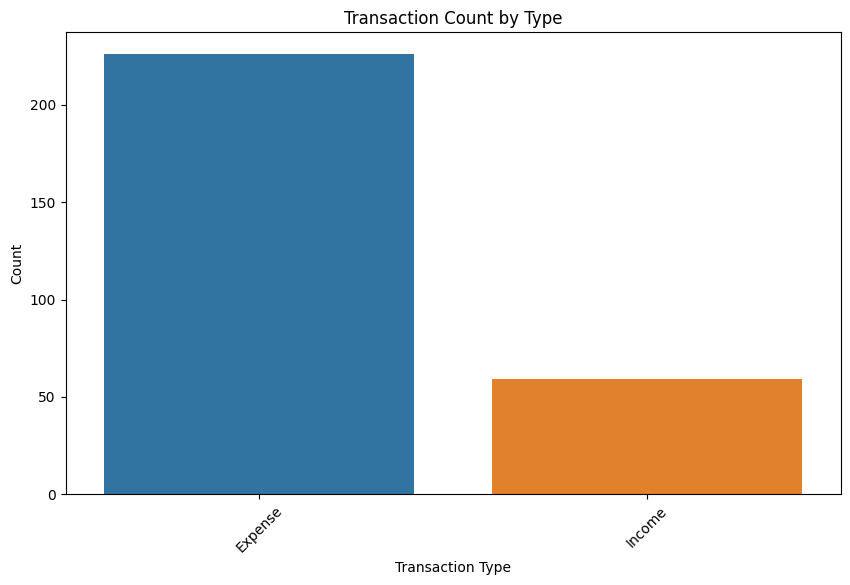

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot jumlah transaksi berdasarkan Type
plt.figure(figsize=(10, 6))
sns.countplot(data=casflow, x='Type', order=casflow['Type'].value_counts().index)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Transaction Count by Type')
plt.xticks(rotation=45)
plt.show()

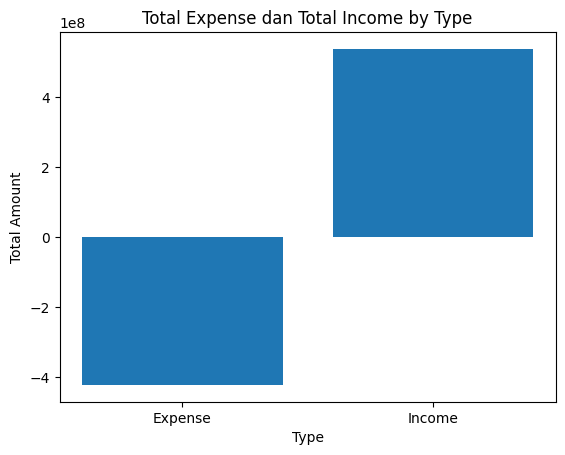

In [53]:
# Bar Plot Total Amount berdasarkan Type
plt.bar(['Expense', 'Income'], [total_expense, total_income])
plt.xlabel('Type')
plt.ylabel('Total Amount')
plt.title('Total Expense dan Total Income by Type')
plt.show()

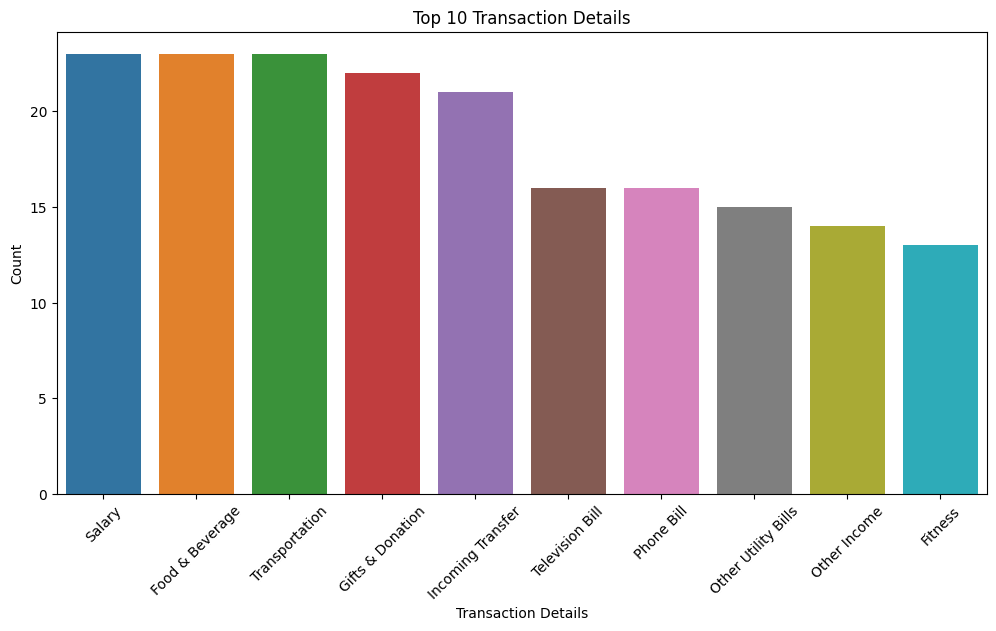

In [54]:
# Bar plot jumlah transaksi berdasarkan Details
plt.figure(figsize=(12, 6))
sns.countplot(data=casflow, x='Details', order=casflow['Details'].value_counts().index[:10])
plt.xlabel('Transaction Details')
plt.ylabel('Count')
plt.title('Top 10 Transaction Details')
plt.xticks(rotation=45)
plt.show()


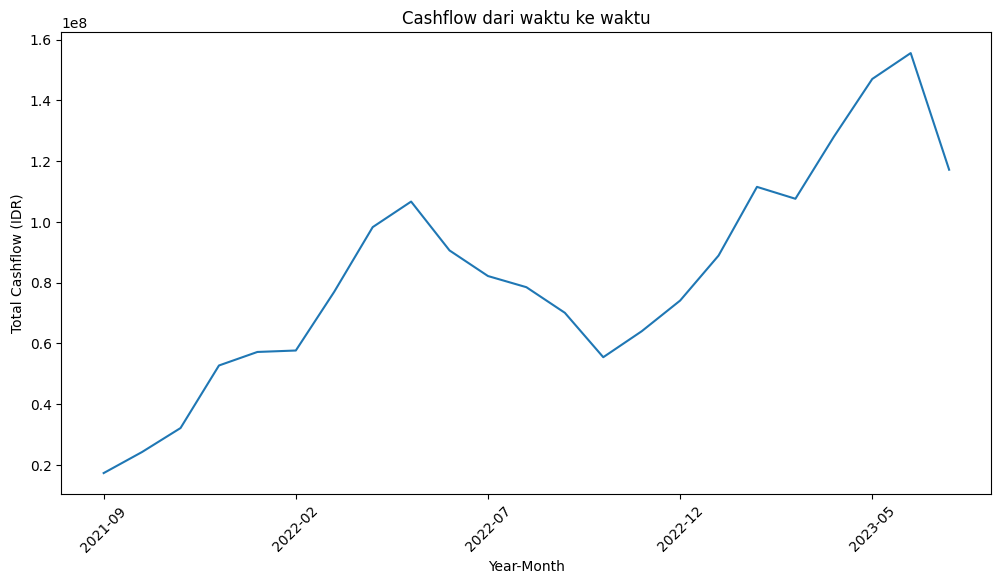

In [55]:
# Line plot perkembangan Cashflow dari waktu ke waktu
plt.figure(figsize=(12, 6))
cashflow_over_time.plot()
plt.xlabel('Year-Month')
plt.ylabel('Total Cashflow (IDR)')
plt.title('Cashflow dari waktu ke waktu')
plt.xticks(rotation=45)
plt.show()

#Answer

Jelaskan informasi dan insight apa saja yang bisa disampaikan dari hasil
visualisasi data.

* Gambar grafik  bar plot pertama bisa di simpulkan bahwa Perusahaan lebih banyak pengeluaran daripada pemasukan.
* Namun ternyata Bar plot selanjutnya menunjukan bahwa jumlah uang income yang didapatkan perusahaan lebih banyak daripada pengeluaran.
* Jumlah transaksi terbanyak top 3 adalah kategori Salary, Food & Beverage, Transportatin. Dan transaksi yang paling sedikit dari kategori Fitnes
* Cashflow dari bulan September tahun 2021 sampai bulan Juli 2023 meningkat 100.000.000. Artinya perusahaan mengalami perkembangan. Namun perusahaan juga mengalami penurunan cashflow pesat pada bulan Mei 2022 sampai Oktober 2022. Yang akhirnya naik pesat lagi sampai Juni 2023.


#Tambahkan kelompok variable lain jika dirasa ada insight yangmenarik.

* Kelompok Variabel Lain yang dapat dieksplorasi lebih lanjut adalah penyebab cashflow menurun pada bulan Mei 2022 sampai Oktober 2022.

In [56]:
# memfilter cashflow bulan mei 2022 sampai oktober 2022 dan berdasarkan pengeluaran
filtered_month_expense = casflow[(casflow['Year-Month'] >= '2022-05') & (casflow['Year-Month'] <= '2022-10') & (casflow['Type'] == 'Expense')]
filtered_month_expense

,Year,Month,Year-Month,Type,Details,Amount
85,2022,5,2022-05,Expense,Food & Beverage,-2454607.0
86,2022,5,2022-05,Expense,Gifts & Donation,-1650425.0
87,2022,5,2022-05,Expense,Electricity Bill,-502500.0
88,2022,5,2022-05,Expense,Transportation,-351000.0
89,2022,5,2022-05,Expense,Fun Money,-135000.0
90,2022,5,2022-05,Expense,Television Bill,-46500.0
91,2022,5,2022-05,Expense,Phone Bill,-30500.0
92,2022,5,2022-05,Expense,Other Utility Bills,-21667.0
95,2022,6,2022-06,Expense,Vehicle Maintenance,-25000000.0
96,2022,6,2022-06,Expense,Gifts & Donation,-2124000.0


In [57]:
# Selanjutnya Menjumlahkan pengeluaran berdasarkan kolom details
expense_by_type = filtered_month_expense.groupby('Details')['Amount'].sum().reset_index()

In [58]:
expense_by_type

,Details,Amount
0,Date,-2823506.0
1,Electricity Bill,-1003250.0
2,Fitness,-463300.0
3,Food & Beverage,-6747706.0
4,Fun Money,-15323329.0
5,Gifts & Donation,-19226189.0
6,Makeup,-984074.0
7,Medical Check-up,-92500.0
8,Other Expense,-473500.0
9,Other Utility Bills,-409834.0


In [59]:
# Merubah value Amount menjadi data positif supaya grafik Y keatas
expense_by_type['Amount']= expense_by_type['Amount'].astype('str') # menjadikan string supaya "-" bisa di replace
expense_by_type['Amount'] = expense_by_type['Amount'].str.replace('-', '') # replace "-" untuk menghapus minus
expense_by_type['Amount']= expense_by_type['Amount'].astype('float') # merubah kembali ke float agar bisa di ploting

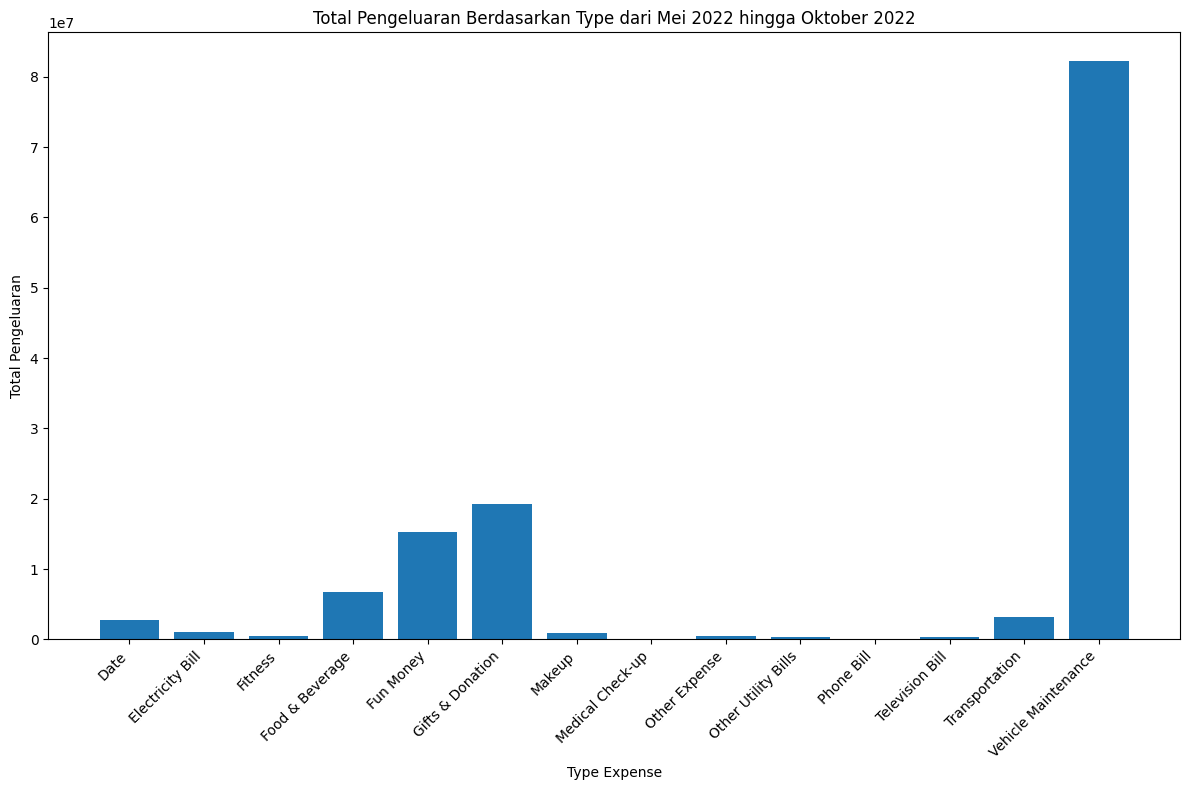

In [61]:
# Ploting Total Pengeluaran Berdasarkan Type dari Mei 2022 hingga Oktober 2022
plt.figure(figsize=(12, 8))
plt.bar(expense_by_type['Details'], expense_by_type['Amount'])
plt.xlabel('Type Expense')
plt.ylabel('Total Pengeluaran')
plt.title('Total Pengeluaran Berdasarkan Type dari Mei 2022 hingga Oktober 2022')
plt.xticks(rotation=45, ha='right')  # Mengatur label x agar lebih mudah dibaca
plt.tight_layout()
plt.show()

Ternyata Penyebab Cashflow menurun pada bulan Mei sampai Oktober tahun 2022 adalah terlalu banyak pengeluaran untuk **Perawatan Kendaraan Perusahaan**.